# EDA - Human Activity Recognition with Smartphones

Recordings of 30 study participants performing activities of daily living

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

## Zbiór danych

Zbiór danych zawiera dane zebrane z czujników ruchu smartfona (*żyroskop i akcelerometr*) podczas doświadczeń polegających na wykonywaniu podstawowych czynności ruchowych - chodzenie, stanie, leżenie,  wchodzenie i schodzenie po schodach - przez 30 różnych osób. Każdy z czujników mierzy wartości (*akcelerometr w jednostkach g - 9.81m/s^2, żyroskop w rad/s*) 50 razy na sekundę dla każdej z trzech osi XYZ. Surowe dane pogrupowano w 2.56s okna (*czyli 128 punktów pomiarowych*), które nachodzą na siebie w 50% (*czyli w połowie okna pomiarowego kolejne punkty pomiarowe będą należeć również dla kolejnego okna*), uzyskujac w ten sposób 11500 obserwacji.

### Przetwarzenie danych

Następnie każdy z takich szeregów czasowych został przetworzone przez filtry odszumiające oraz oddzielające przyśpieszenie ruchu człowieka od grawitacyjnego.

Wyliczono również dodatkowe wartości takie jak zryw (*pochodna przyśpieszenia*) czy normę wartośći (*trzywymiarowego wektora z każdej osi XYZ*) dla każdej ze zmiennych.

Dalej na sygnałach zastosowano szybką transformatę Fouriera, jest to operacja pozwalająca scharakteryzować sygnał na przestrzeni występujących w nim częstotliwości. 
Przykład trasformaty Fouriera: ![](fourier.png)


Wszystkie te wyliczone i uzyskane zmienne zostały przekszałcone przez wiele funkcji takie tak średnia, min, max, IQR itd. uzyskując w ten sposób finalne 561 cech dla każdej z obserwacji (*2.56s okna pomiarowego*). Bardziej szczegółowe informacje o danych i ich przekształcenia znajdują się w pliku `features_info.txt`, natomiast lista wszsytkich 561 cech znajduje się w pliku `features.txt`.

## Wczytanie danych

In [ ]:
# wczytanie nazw kolumn
with open('./UCI_HAR_Dataset/features.txt') as f:
    col_names = f.readlines()
    col_names = [x.split()[1] for x in col_names]

In [ ]:
# wczytanie X_train
X_train = pd.read_csv('./UCI_HAR_Dataset/train/X_train.txt', header=None)
list_matrix = []
for row in X_train.values:
    list_matrix.append(row[0].split())
X_train = pd.DataFrame(data=list_matrix)

# wczytanie X_test
X_test = pd.read_csv('./UCI_HAR_Dataset/test/X_test.txt', header=None)
list_matrix = []
for row in X_test.values:
    list_matrix.append(row[0].split())
X_test = pd.DataFrame(data=list_matrix)

In [ ]:
#dołącznie nazw kolumn
X_train.columns = col_names
X_test.columns = col_names

In [ ]:
# na potrzeby EDA połączymy zbiory treningowe i testowe
df = pd.concat([X_train, X_test])
del X_train, X_test

In [ ]:
df = df.applymap(float)

In [ ]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


## Pierwszy rzut oka na dane

Dane są przeskalowane:

In [ ]:
print(f"Maksymalna wartość w ramce: {df.max().max()}")
print(f"Minimalna wartość w ramce: {df.min().min()}")

Maksymalna wartość w ramce: 1.0
Minimalna wartość w ramce: -1.0


In [ ]:
print(f"Liczba brakujących wartości: {df.isnull().sum().sum()}")

Liczba brakujących wartości: 0


Spójrzmy, jak wyglądało kilka aktywności zapisanych w surowych danych.

Użyję tutaj kolumny `y` i `subject`, ale tylko po to, by wyciągnąć wszystkie obserwacje dotyczące tego samego pomiaru (które zostały podzielone na 2.56-sekundowe okna).

In [ ]:
y_train = pd.read_csv("./UCI_HAR_Dataset/train/y_train.txt", header=None)
subject_train = pd.read_csv("./UCI_HAR_Dataset/train/subject_train.txt", header=None)
y_test = pd.read_csv("./UCI_HAR_Dataset/test/y_test.txt", header=None)
subject_test = pd.read_csv("./UCI_HAR_Dataset/test/subject_test.txt", header=None)

w1 = pd.concat([y_train, y_test])
w2 = pd.concat([subject_train, subject_test])

df_tmp = df.copy()
df_tmp['y'] = w1[0].values
df_tmp['subject'] = w2[0].values

In [ ]:
# find each activity boundaries

lower = [0]
upper = []

i = 0
y_act = df_tmp.y.values[0]
subject_act = df_tmp.subject.values[0]

for index, row in df_tmp.iterrows():
    if y_act == row.y and subject_act == row.subject:
        i += 1
    else:
        y_act = df_tmp.y.values[i]
        subject_act = df_tmp.subject.values[i]
        upper.append(i)
        i += 1
        lower.append(i)
upper.append(i)

In [ ]:
print(f"Total different activities: {len(upper)}")

Total different activities: 400


In [ ]:
from functions import plot_eight_activities

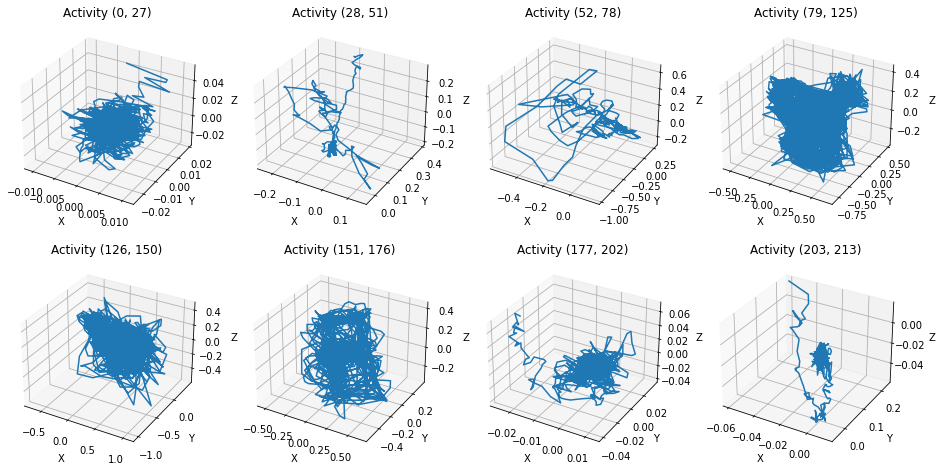

In [ ]:
plot_eight_activities((lower[0], upper[0]), (lower[1], upper[1]), (lower[2], upper[2]), (lower[3], upper[3]),
                     (lower[4], upper[4]), (lower[5], upper[5]), (lower[6], upper[6]), (lower[7], upper[7]))
plt.show()

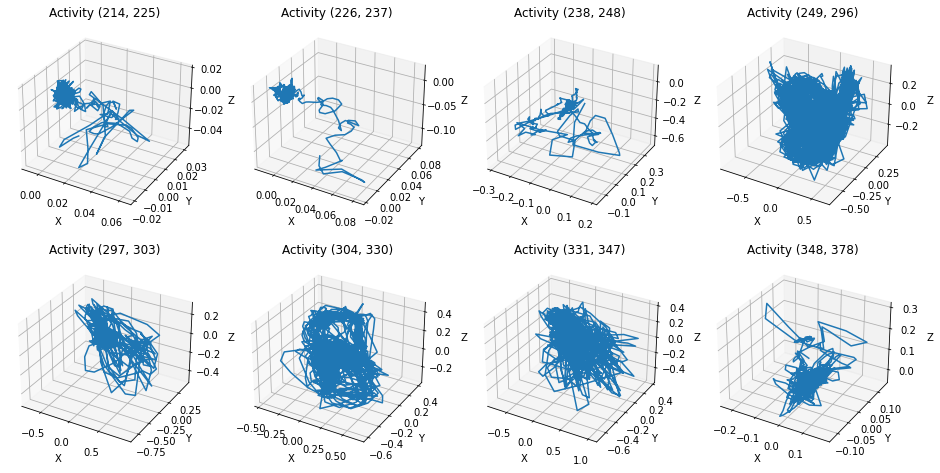

In [ ]:
plot_eight_activities((lower[8], upper[8]), (lower[9], upper[9]), (lower[10], upper[10]), (lower[11], upper[11]),
                     (lower[12], upper[12]), (lower[13], upper[13]), (lower[14], upper[14]), (lower[15], upper[15]))
plt.show()

Spójrzmy na trójwymiarowy rozkład dwóch podstawowych statystyk: średniej i odchylenia standardowego dla wielkości `fBodyAcc`

In [ ]:
from functions import plot3d_columns_df

In [ ]:
xlab = df.columns.get_loc('tBodyAcc-mean()-X')
ylab = df.columns.get_loc('tBodyAcc-mean()-Y')
zlab = df.columns.get_loc('tBodyAcc-mean()-Z')

print(f"X : {xlab}")
print(f"Y : {ylab}")
print(f"Z : {zlab}")

X : 0
Y : 1
Z : 2


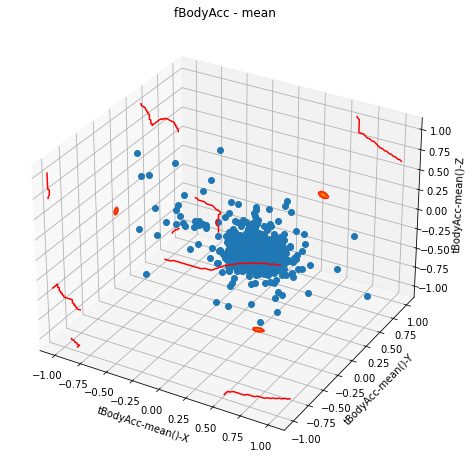

In [ ]:
lim = [-1.1, 1.1]
plot3d_columns_df(df, xlab, ylab, zlab, lim, lim, lim, (8, 8), df.columns[xlab], df.columns[ylab], df.columns[zlab])
plt.title("fBodyAcc - mean")
plt.show()

Większość obserwacji skupiona jest wokół środka układu współrzędnych. Dane są po skalowaniu do przedziału $(-1, 1)$, więc taki widok świadczy o występowaniu outlierów, które są widoczne na wykresie jako pojedyncze punkty poza "środkiem".

In [ ]:
xlab = df.columns.get_loc('tBodyAcc-std()-X')
ylab = df.columns.get_loc('tBodyAcc-std()-Y')
zlab = df.columns.get_loc('tBodyAcc-std()-Z')

print(f"X : {xlab}")
print(f"Y : {ylab}")
print(f"Z : {zlab}")

X : 3
Y : 4
Z : 5


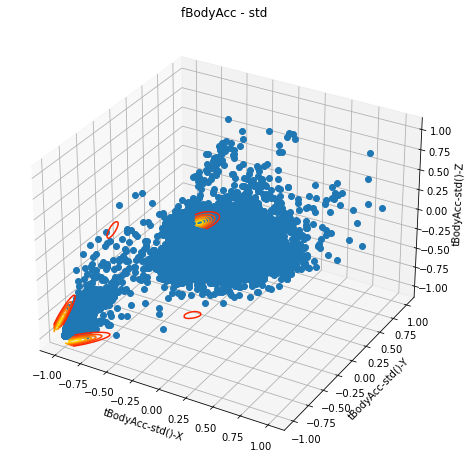

In [ ]:
lim = [-1.1, 1.1]
plot3d_columns_df(df, xlab, ylab, zlab, lim, lim, lim, (8, 8), df.columns[xlab], df.columns[ylab], df.columns[zlab])
plt.title("fBodyAcc - std")
plt.show()

Na wykresie można wyróżnić dwie grupy. Jedna (bardzo liczna) skupiona jest wokół punktu $(-1, -1, -1)$. Pamiętając, że dane są przeskalowane, ta grupa oznacza aktywności cechujące się małą zmiennością przyspieszenia w każdym z kierunków - może to być np. siedzenie.

Druga grupa jest bardziej rozproszona, co może oznaczać inne aktywności wymagające zmienności ruchów.

## Badanie wariancji kolumn

In [ ]:
var = df.var(axis = 0).to_frame().reset_index()
var.columns = ['colname', 'val']
var.head()

,colname,val
0,tBodyAcc-mean()-X,0.004574
1,tBodyAcc-mean()-Y,0.001379
2,tBodyAcc-mean()-Z,0.002813
3,tBodyAcc-std()-X,0.192452
4,tBodyAcc-std()-Y,0.250240


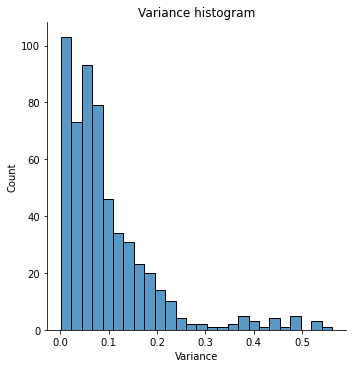

In [ ]:
sns.displot(var, x = 'val')
plt.title('Variance histogram')
plt.xlabel('Variance')

plt.show()

Duża liczba kolumn ma znikomą wariancję i można **podejrzewać**, że mało różnicują dane. Przyjrzyjmy się, które kolumny miały największą wariancję:

In [ ]:
var[var.val > 0.4].sort_values(by = 'val', ascending = False)

,colname,val
366,fBodyAccJerk-entropy()-X,0.561720
367,fBodyAccJerk-entropy()-Y,0.539207
234,tBodyAccJerkMag-entropy(),0.524056
287,fBodyAcc-entropy()-X,0.522666
78,"tGravityAcc-correlation()-X,Z",0.495532
79,"tGravityAcc-correlation()-Y,Z",0.491624
56,tGravityAcc-energy()-X,0.485049
77,"tGravityAcc-correlation()-X,Y",0.484871
260,tBodyGyroJerkMag-entropy(),0.479467
510,fBodyAccMag-entropy(),0.459960


Jak widać, najbardziej "rozrzucone" dane są te, które zostały opisaną statystyką entropy (czyli opisującą jak bardzo regularny jest dany szereg czasowy). Ponadto, kolumny na samym szczycie zawierają słówko `Jerk`. W fizyce, `Jerk signal` to pochodna przyspieszenia po czasie, czyli ta wielkość opisuje jak przyspieszenie zmieniało się w czasie. 

Wydaje się logiczne to, że te wielkości powinny różnicować zbiór danych, ponieważ podstawowymi danymi sensorowymi było przyspieszenie w każdej z trzech płaszczyzn. I na przykład, bieganie powinno się charakteryzować dużymi zmianami przyspieszenia, podczas gdy siedzenie już nie.

Warto zauważyć, że `fBodyAccJerk-entropy()` w płaszczyznach X i Y mają największą wariancję w całym zbiorze danych, podczas gdy płaszczyzna Z jest na końcu powyższego zestawienia.

Przyjrzyjmy się rozkładowi tej zmiennej w trzech płaszczyznach.

In [ ]:
xlab = df.columns.get_loc('fBodyAccJerk-entropy()-X')
ylab = df.columns.get_loc('fBodyAccJerk-entropy()-Y')
zlab = df.columns.get_loc('fBodyAccJerk-entropy()-Z')

print(f"X : {xlab}")
print(f"Y : {ylab}")
print(f"Z : {zlab}")

X : 366
Y : 367
Z : 368


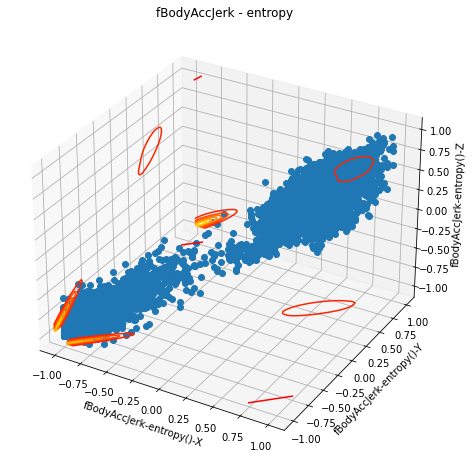

In [ ]:
lim = [-1.1, 1.1]
plot3d_columns_df(df, xlab, ylab, zlab, lim, lim, lim, (8, 8), df.columns[xlab], df.columns[ylab], df.columns[zlab])
plt.title("fBodyAccJerk - entropy")
plt.show()

Na powyższym wykresie widać dokładnie dwie grupy, które z pewności rozróżniają zbiór danych. Zapewne jest to znów podział na aktywności "siedzące" oraz te wymagające większych ruchów. Najwięcej obserwacji skupionych jest blisko punktu $(-1, -1, -1)$, natomiast druga grupa jest słabiej zarysowana na wykresach zrzutowanych gęstości.

Inną zmienną, którą można przedstawić w trzech wymiarach oraz ma dużą warianjcę jest `fBodyAcc-entropy()`. Jest to również statystyka entropy, jednak zmienna opisuje przyspieszenie, a nie jak wcześniej pochodną przyspieszenia. Składowa X znajduje się na czwartym miejscu, natomiast Y pod koniec wygenerowanego zestawienia powyżej. Przyjrzyjmy się również rozkładom tych zmiennych.

In [ ]:
xlab = df.columns.get_loc('fBodyAcc-entropy()-X')
ylab = df.columns.get_loc('fBodyAcc-entropy()-Y')
zlab = df.columns.get_loc('fBodyAcc-entropy()-Z')

print(f"X : {xlab}")
print(f"Y : {ylab}")
print(f"Z : {zlab}")

X : 287
Y : 288
Z : 289


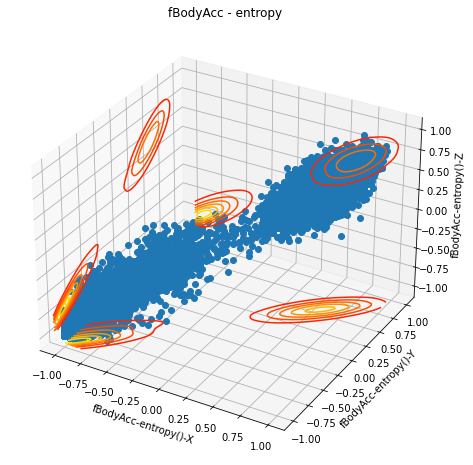

In [ ]:
lim = [-1.1, 1.1]
plot3d_columns_df(df, xlab, ylab, zlab, lim, lim, lim, (8, 8), df.columns[xlab], df.columns[ylab], df.columns[zlab])
plt.title("fBodyAcc - entropy")
plt.show()

Tutaj także, podobnie jak w poprzednim przypadku, wyraźnie widać dwa klastry. Wydają się one być słabiej rozdzielone, jednak z drugiej strony, bardziej skupione w dwóch grupach. Na poprzednim wykresie był jeden duży klaster skupiony bardzo blisko $(-1, -1, -1)$, a drugi był słabo widoczny na wykresach gęstości. Natomiast w tym przypadku obie grupy wydają się być podobnie wyróżnione.

## Badanie Korelacji

In [ ]:
target = pd.concat([y_train, y_test])
df_cor = df.copy(deep=True)
df_cor['activity'] = target

In [ ]:
#wyrzucamy korelacje zmiennych z samą sobą
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df_cor, 10))
#df_cor.corr().unstack().sort_values().drop_duplicates()

Top Absolute Correlations
tBodyAccMag-mad()            tGravityAccMag-mad()          1.0
tBodyAccMag-mean()           tBodyAccMag-sma()             1.0
tBodyAccMag-energy()         tGravityAccMag-energy()       1.0
fBodyBodyGyroJerkMag-mean()  fBodyBodyGyroJerkMag-sma()    1.0
tBodyAccJerkMag-mean()       tBodyAccJerkMag-sma()         1.0
tBodyAccMag-sma()            tGravityAccMag-sma()          1.0
                             tGravityAccMag-mean()         1.0
tBodyAccMag-min()            tGravityAccMag-min()          1.0
tBodyAccMag-max()            tGravityAccMag-max()          1.0
fBodyAccMag-mean()           fBodyAccMag-sma()             1.0
dtype: float64


Zauważmy że praktycznie wszystkie otrzymane wartości to jedynki co nas zastanowiło, ponieważ zostały odfiltrowane korelacje zmiennej z samą sobą. 

Końcówka *Mag* w nazwie kolumny  oznacza, że jest to norma euklidesowa, czyli wszystkie wymiary są potraktowane tak samo, accelometer mierzy przyspieszenie liniowe, gyroscope przespieszenie kątowe. Dodatkowo pamiętajmy, że każda kolumna została przeskalowana do (-1, 1), więc kiedy telefon porusza się w lewo, to automatycznie gyroscope wykryje zmianę kąta i inntuicyję, koniec końców to wyjdzie na to samo

![](Mag.png)


In [ ]:
def get_top_abs_correlations_wo_ones(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    #bez jedynek
    au_corr = au_corr[au_corr != 1]
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations_wo_ones(df_cor, 10))
#df_cor.corr().unstack().sort_values().drop_duplicates()

Top Absolute Correlations
tBodyAccJerk-energy()-Z  fBodyAccJerk-energy()-Z         1.000000
tBodyAccJerk-energy()-Y  fBodyAccJerk-energy()-Y         1.000000
tBodyAccJerk-energy()-X  fBodyAccJerk-energy()-X         0.999999
fBodyAcc-energy()-X      fBodyAcc-bandsEnergy()-1,24     0.999864
fBodyGyro-energy()-X     fBodyGyro-bandsEnergy()-1,24    0.999773
fBodyAcc-energy()-Y      fBodyAcc-bandsEnergy()-1,24     0.999635
tBodyAcc-energy()-X      fBodyAcc-energy()-X             0.999633
tBodyAccJerk-sma()       tBodyAccJerkMag-mean()          0.999615
                         tBodyAccJerkMag-sma()           0.999615
tBodyAcc-energy()-X      fBodyAcc-bandsEnergy()-1,24     0.999514
dtype: float64


In [ ]:
#średnia korelacja między zmiennymi
def get_average_correlation(df):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop)
    mean = au_corr.mean()
    return mean
print("Average correlation ")
get_average_correlation(df_corr)

Average correlation 


0.4152605471630919

<AxesSubplot:>

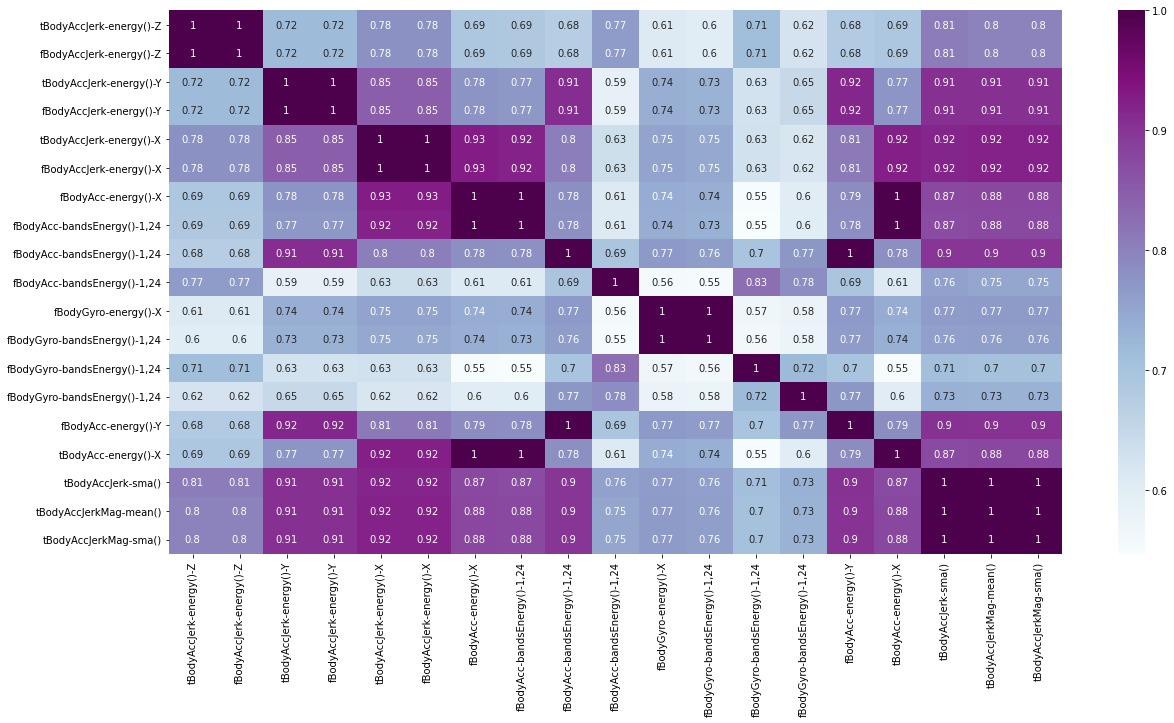

In [ ]:
#mapa korelacji dla najbardziej skorelowanych zmiennych

chosen = np.array(["tBodyAccJerk-energy()-Z", "fBodyAccJerk-energy()-Z", "tBodyAccJerk-energy()-Y", "fBodyAccJerk-energy()-Y",
"tBodyAccJerk-energy()-X", "fBodyAccJerk-energy()-X", "fBodyAcc-energy()-X", "fBodyAcc-bandsEnergy()-1,24", "fBodyGyro-energy()-X",
"fBodyGyro-bandsEnergy()-1,24", "fBodyAcc-energy()-Y", "fBodyAcc-bandsEnergy()-1,24", "tBodyAcc-energy()-X", "fBodyAcc-energy()-X",
"tBodyAccJerk-sma()", "tBodyAccJerkMag-mean()", "tBodyAccJerkMag-sma()", "fBodyAcc-bandsEnergy()-1,24"])
chosen = pd.Series(chosen)
chosen = chosen.drop_duplicates()
#tmp = df[chosen]
#tmp.head()
plt.figure(figsize=(20,10))
plot =df[chosen].corr()
sns.heatmap(plot, cmap = 'BuPu',annot=True)

### Najistotniejsze kolumny na podstawie PCA
Za pomocą PCA znajdźmy kolumny, które najbardziej różnicują zbiór danych. Będziemy wybierać kolumny o największych (co do modułu) współczynnikach przy tworzeniu wyliczonych komponentów.

In [ ]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(df)
components = np.array(pca.components_)

PCA(n_components=10)

In [ ]:
# najistotniejsze kolumny wg PCA
indexes = components.argmax(axis=1)
np.unique(df.columns[indexes])

array(['angle(X,gravityMean)', 'angle(tBodyGyroMean,gravityMean)',
       'fBodyAcc-kurtosis()-Y', 'fBodyAccJerk-entropy()-X',
       'tBodyGyro-entropy()-X', 'tBodyGyroMag-arCoeff()1',
       'tGravityAcc-correlation()-X,Y', 'tGravityAcc-correlation()-X,Z',
       'tGravityAcc-correlation()-Y,Z', 'tGravityAcc-entropy()-Z'],
      dtype=object)

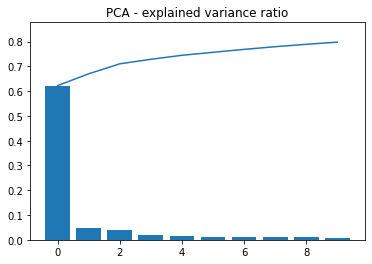

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylim(0, np.cumsum(pca.explained_variance_ratio_).max() * 1.1)
plt.bar(range(10), pca.explained_variance_ratio_)
plt.title("PCA - explained variance ratio");


In [ ]:
pca.explained_variance_ratio_

array([0.62227069, 0.04772595, 0.04018191, 0.01823199, 0.01611045,
       0.01201821, 0.01187003, 0.01076237, 0.00960751, 0.00887131])

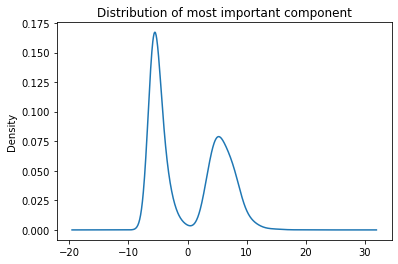

In [ ]:
most_important_component = pca.transform(df)[:,0]
pd.Series(most_important_component).plot.kde()
plt.title("Distribution of most important component")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=506946ac-f102-4e2e-b0cb-b48c8097449e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>